In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as Keras_backend

#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical 

import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# reshape a Python array using reshape() called from NumPy
demoData = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
newData = np.reshape(demoData, (6, 2))
print(newData)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [3]:
# reshape a NumPy array by calling reshape() as one of its methods
demoData = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
newData = demoData.reshape((6, 2))
print(newData)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [4]:
# reshaping to an incompatible size causes an error
demoData = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
# uncomment the next line to see the error
# demoData.reshape((5,15))

In [6]:
# cwr: try starting from 1d list/array/tensor
demoData = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
newData = demoData.reshape((6, 2))
print(newData)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [7]:
random_seed = 42
np.random.seed(random_seed)

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = Keras_backend.cast_to_floatx(X_train)
X_test = Keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
print("samples_train shape = ",X_train.shape)
print("labels_train shape = ",y_train.shape)
print("samples_test shape = ",X_test.shape)
print("labels_test shape = ",y_test.shape)

samples_train shape =  (60000, 28, 28)
labels_train shape =  (60000, 10)
samples_test shape =  (10000, 28, 28)
labels_test shape =  (10000, 10)


In [8]:
def show_demo_grid(seed, filename):
    # Show a grid of random digits
    demo_grid = [[[] for x in range(10)] for y in range(10)] 
    num_found = 0
    attempts = 0
    np.random.seed(seed)
    while (num_found < 100) and (attempts < X_train.shape[0]):
        attempts += 1
        index = np.random.randint(0, X_train.shape[0])
        label = original_y_train[index]
        placed = False
        for column in range(10):
            if (not placed) and (not demo_grid[label][column]):
                num_found += 1
                demo_grid[label][column] = index
                placed = True

    plt.figure(figsize=(20,20))
    for y in range(10):
        for x in range(10):
            plt.subplot(10, 10, 1 + (y*10) + x)
            list_index = demo_grid[y][x]
            img = X_train[list_index].reshape(28, 28)
            plt.imshow(img, cmap=plt.get_cmap('gray'))
            frame = plt.gca()
            frame.axes.get_xaxis().set_visible(False)
            frame.axes.get_yaxis().set_visible(False)
    #file_helper.save_figure(filename)
    plt.show()

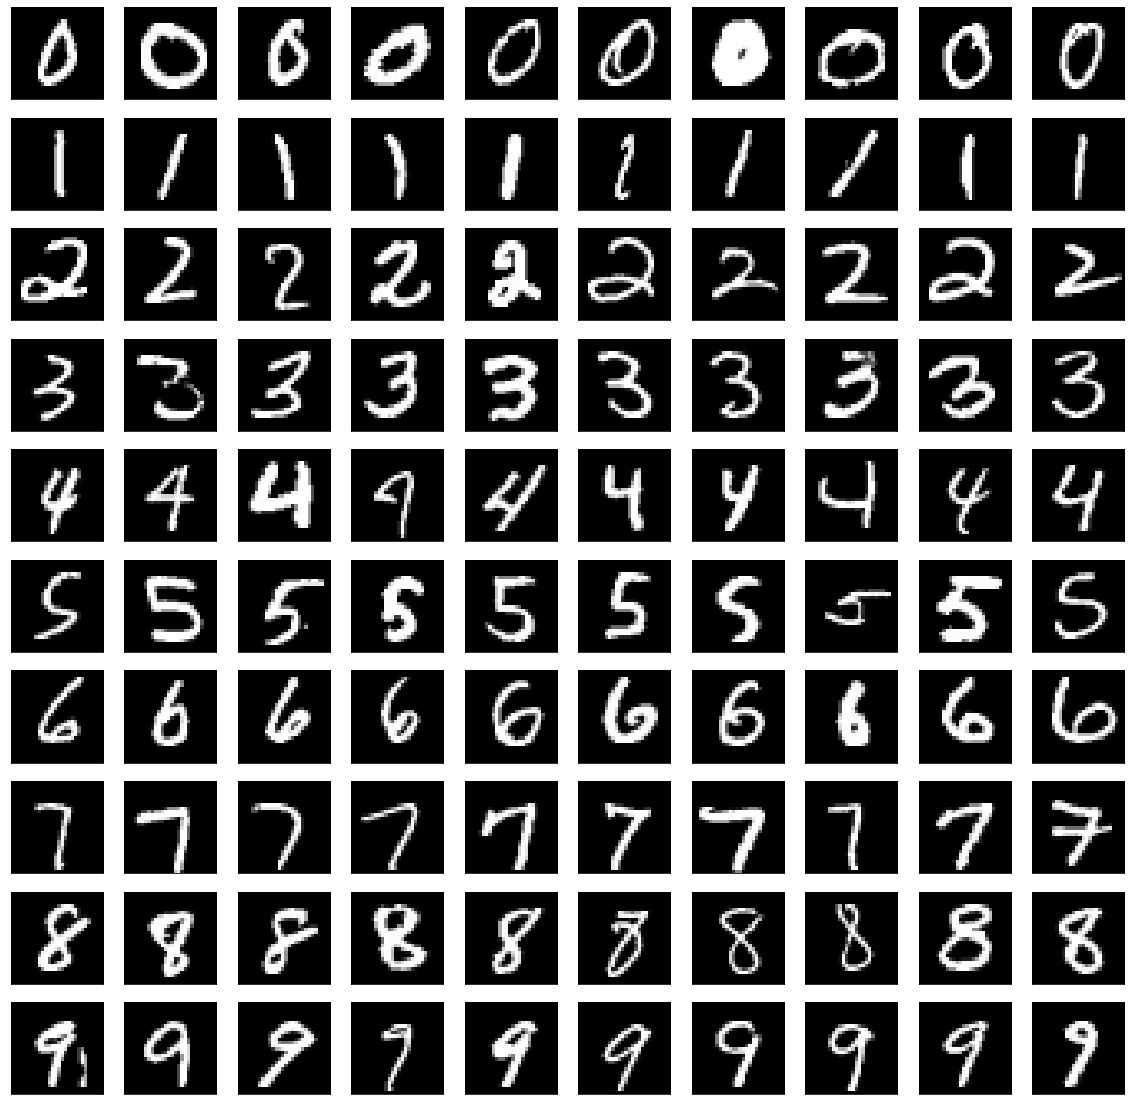

--


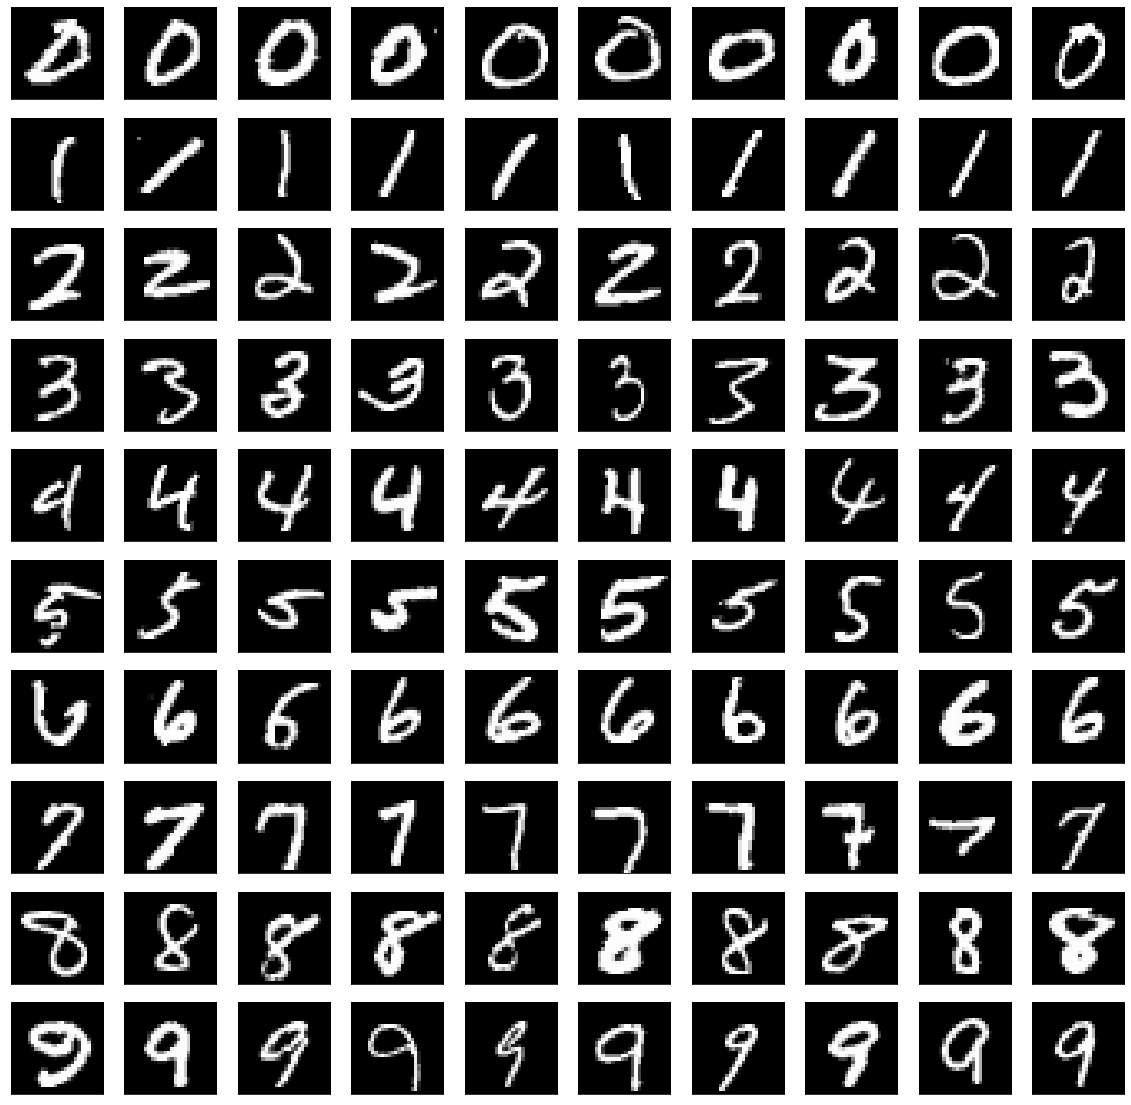

In [9]:
show_demo_grid(5, 'MNIST-demo')
print('--')
show_demo_grid(42, 'MNIST-demo2')